# Assignment on Cross validation, Grid search

**Import required libraries**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Read the dataset into python environment**

In [2]:
df=pd.read_csv('/content/titanic.csv')

Check basic details of dataset

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Check for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Split the data set into test and train**

In [9]:
X = df[['Pclass','SibSp','Parch','Fare']]
y = df.Survived

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

**Standard Scaling**

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

**Logistic Regression**

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       139
           1       0.70      0.48      0.57        84

    accuracy                           0.73       223
   macro avg       0.72      0.68      0.68       223
weighted avg       0.72      0.73      0.71       223



**Applying K-Fold cross validation to Logistics Regression**

In [19]:
from sklearn.model_selection import cross_val_score, KFold
model=LogisticRegression()
kf=KFold(n_splits=10)
score=cross_val_score(model,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.58888889 0.66292135 0.71910112 0.61797753 0.69662921 0.6741573
 0.70786517 0.70786517 0.74157303 0.75280899]
Average Cross Validation score :0.6869787765293383


**KNN**

In [13]:
from sklearn.neighbors import KNeighborsClassifier
#Find optimum K-value
acc_values=[]
neighbors=np.arange(2,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

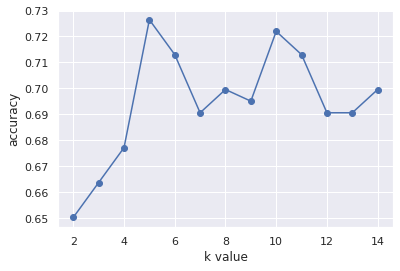

In [18]:
#Plot graph to check optimum k value
sns.set()
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

Optimum number of K-value is 5

In [20]:
#Optimum value is 4. Make a model with K value as 5
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       139
           1       0.66      0.56      0.61        84

    accuracy                           0.73       223
   macro avg       0.71      0.69      0.70       223
weighted avg       0.72      0.73      0.72       223



**Apply K-Fold cross validation to KNN**

In [21]:
kmodel = KNeighborsClassifier()
kf=KFold(n_splits=10)
score=cross_val_score(kmodel,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.64444444 0.60674157 0.59550562 0.60674157 0.66292135 0.75280899
 0.69662921 0.70786517 0.68539326 0.74157303]
Average Cross Validation score :0.6700624219725343


**Decision Tree**

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73       139
           1       0.52      0.39      0.45        84

    accuracy                           0.64       223
   macro avg       0.60      0.59      0.59       223
weighted avg       0.62      0.64      0.62       223



**Applying K-Fold cross validation to Decision Tree**

In [23]:
model = DecisionTreeClassifier()
kf=KFold(n_splits=10)
score=cross_val_score(model,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.66666667 0.68539326 0.6741573  0.56179775 0.64044944 0.78651685
 0.65168539 0.73033708 0.75280899 0.70786517]
Average Cross Validation score :0.6857677902621723


**Random Forest**

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators = 100)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       139
           1       0.53      0.39      0.45        84

    accuracy                           0.64       223
   macro avg       0.61      0.59      0.59       223
weighted avg       0.63      0.64      0.63       223



**Apply K-Fold to Random Forest**

In [25]:
model = RandomForestClassifier()
kf=KFold(n_splits=10)
score=cross_val_score(model,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.68888889 0.62921348 0.6741573  0.59550562 0.68539326 0.7752809
 0.69662921 0.75280899 0.73033708 0.73033708]
Average Cross Validation score :0.6958551810237203


**SVM**

In [26]:
from sklearn.svm import SVC
model1 = SVC(kernel='linear', C=1, gamma='auto')
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       139
           1       0.58      0.68      0.63        84

    accuracy                           0.70       223
   macro avg       0.68      0.69      0.68       223
weighted avg       0.71      0.70      0.70       223



**Apply K-Fold to SVM**

In [27]:
model = SVC()
kf=KFold(n_splits=10)
score=cross_val_score(model,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.57777778 0.68539326 0.66292135 0.6741573  0.64044944 0.70786517
 0.65168539 0.71910112 0.73033708 0.68539326]
Average Cross Validation score :0.6735081148564295


**Based on the Average cross validation score, the best model is Random Forest with an average score of 69.58%**

Apply Grid search to SVM to identify the best possible model

In [28]:
parameters ={'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf']}

In [31]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    SVC(), 
    parameters, 
    cv=5,
    scoring='accuracy',n_jobs=-1)
 
# fitting the model for grid search
grid_result= grid_search.fit(X_train, y_train)
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score:  0.7335315901694535


In [32]:
model = SVC(C=1000, gamma=0.01,kernel='rbf')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       139
           1       0.65      0.49      0.56        84

    accuracy                           0.71       223
   macro avg       0.69      0.66      0.67       223
weighted avg       0.70      0.71      0.70       223

